<a href="https://colab.research.google.com/github/conormooney98/Applied-Predictive-Analytics/blob/main/Logistic_Regression_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression Model

##Import the libraries

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

## Load Data From CSV File

In [2]:
dataset = pd.read_csv("NBAdata5new.csv")

In [3]:
# Data pre-processing and selection

dataset['TEAM'] = dataset['TEAM'].astype('category')
dataset['enc_Team'] = dataset['TEAM'].cat.codes
data1 = dataset
X = dataset.drop(labels=['WL','TEAM','Date', '+/-', 'FTM', '3PA', 'PF', 'FTM', '3PM', 'OREB'], axis=1).values
y = dataset["WL"].values

In [4]:
dataset.shape

(500, 24)

In [5]:
#Also, we normalize the dataset

from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

In [6]:
#We split our dataset into train and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (400, 15) (400,)
Test set: (100, 15) (100,)


## Modeling (Logistic Regression with Sklearn)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=1).fit(X_train,y_train)
LR

LogisticRegression(C=1)

In [8]:
#Now we can predict using our test set
yhat = LR.predict(X_test)

In [9]:
#predict_proba returns estimates for all classes, ordered by the label of classes. 
#So, the first column is the probability of class 0, P(Y=0|X), and second column is probability of class 1, P(Y=1|X)

yhat_prob = LR.predict_proba(X_test)

### Confusion Matrix

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.0f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[44  6]
 [ 6 44]]


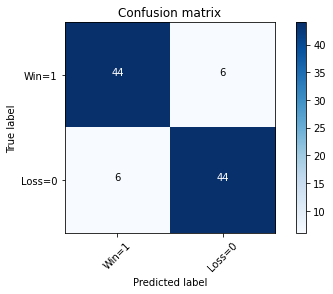

In [11]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Win=1','Loss=0'],  title='Confusion matrix')

In [12]:
#Classification report
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        50
           1       0.88      0.88      0.88        50

    accuracy                           0.88       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.88      0.88      0.88       100



### Log Loss

In [13]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.28779690568238786

In [14]:
#Print log loss
model = LogisticRegression(C=1)
LR = model.fit(X_train,y_train)
y_prediction = LR.predict_proba(X_test)
print("LogLoss: %.3f" % log_loss(y_test, y_prediction))

LogLoss: 0.288


In [15]:
#Import evaluation metrics and call results
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score

accuracy = accuracy_score(y_test, yhat)
precision=precision_score(y_test, yhat)
recall=recall_score(y_test, yhat)
f1= f1_score(y_test, yhat)

print("Accuracy :", round(accuracy,2) )
print("Precision :", round(precision,2))
print("Recall :", round(recall,2))
print("F1 :", round(f1,2))

Accuracy : 0.88
Precision : 0.88
Recall : 0.88
F1 : 0.88


In [16]:
#Cross Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

C_range = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]
mean_acc=np.zeros((len(C_range)))
std_acc=np.zeros((len(C_range)))
cv = KFold(n_splits=5, random_state=1, shuffle=True)

mean_acc=np.zeros((len(C_range)))
std_acc=np.zeros((len(C_range)))
ConfustionMx=[];
i = 0
for C in C_range:
    classifier = model = LogisticRegression(C=C)
    scores = cross_val_score(classifier, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    mean_acc[i]= mean(scores)
    std_acc[i]= std(scores)
    i = i + 1

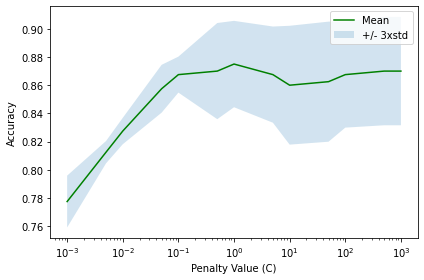

In [17]:
#Lets visualize what we have done
plt.plot(C_range, mean_acc,'g')
plt.fill_between(C_range, mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.2)
plt.legend(('Mean', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Penalty Value (C)')
plt.xscale('log')
plt.tight_layout()
plt.show()

In [18]:
print(mean_acc)

[0.78 0.81 0.83 0.86 0.87 0.87 0.88 0.87 0.86 0.86 0.87 0.87 0.87]


In [19]:
print(std_acc)

[0.02 0.01 0.01 0.02 0.01 0.03 0.03 0.03 0.04 0.04 0.04 0.04 0.04]
